In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('github_dataset.csv')



In [2]:
# 数据摘要
# 标称属性，给出每个可能取值的频数
nominal_attributes = ['language']
for col in nominal_attributes:
    print("=== {} ===".format(col))
    print(df[col].value_counts())
    print()

=== language ===
JavaScript          253
Python              155
HTML                 72
Java                 44
TypeScript           37
CSS                  37
Dart                 36
Jupyter Notebook     29
C++                  29
Ruby                 28
C                    26
Shell                25
PHP                  16
Go                   15
Swift                10
Rust                 10
Objective-C           8
C#                    8
Kotlin                7
Makefile              6
Jinja                 5
SCSS                  4
Dockerfile            3
Perl                  3
CoffeeScript          3
Solidity              3
AutoHotkey            3
CodeQL                2
Pawn                  2
Vue                   2
PowerShell            2
Assembly              2
Elixir                2
Hack                  2
Vim Script            2
Haskell               1
Gherkin               1
QMake                 1
Cuda                  1
Smarty                1
Oz                    1

In [3]:
# 数值属性，给出5数概括及缺失值的个数
numeric_attributes = ['stars_count', 'forks_count', 'issues_count', 'pull_requests', 'contributors']
numeric_summary = df[numeric_attributes].describe()
missing_values_count = df[numeric_attributes].isnull().sum()
print("=== Numeric Summary ===")
print(numeric_summary)
print("\n=== Missing Values Count ===")
print(missing_values_count)

=== Numeric Summary ===
       stars_count  forks_count  issues_count  pull_requests  contributors
count  1052.000000  1052.000000   1052.000000    1052.000000   1052.000000
mean     81.976236    53.884981      8.656844       4.374525      8.364068
std     170.403116   127.699729     32.445154      27.913732     37.511807
min       0.000000     0.000000      1.000000       0.000000      0.000000
25%       1.000000     1.000000      1.000000       0.000000      0.000000
50%      12.000000     6.000000      2.000000       0.000000      2.000000
75%      65.250000    38.250000      6.000000       2.000000      4.000000
max     995.000000   973.000000    612.000000     567.000000    658.000000

=== Missing Values Count ===
stars_count      0
forks_count      0
issues_count     0
pull_requests    0
contributors     0
dtype: int64


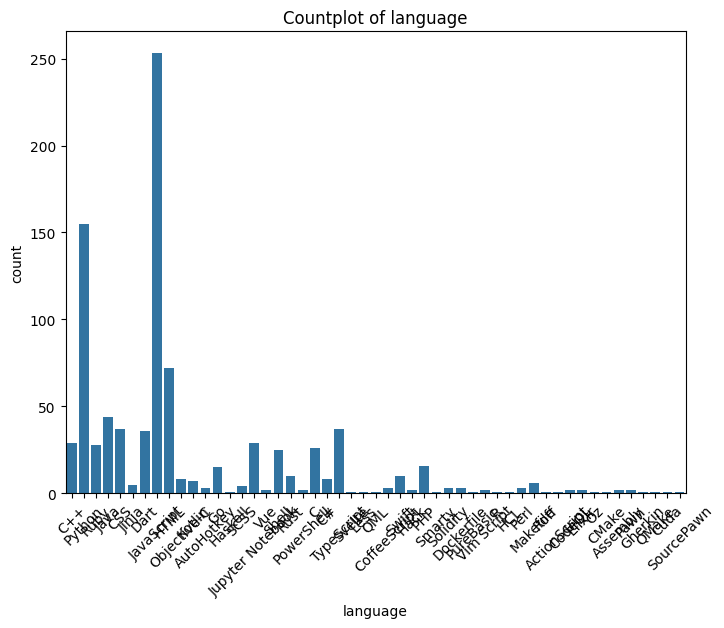

In [4]:
# 数据可视化
# 使用直方图、盒图等检查数据分布及离群点

# 对标称属性进行可视化处理
for col in nominal_attributes:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=col)
    plt.title('Countplot of {}'.format(col))
    plt.xticks(rotation=45)
    plt.show()

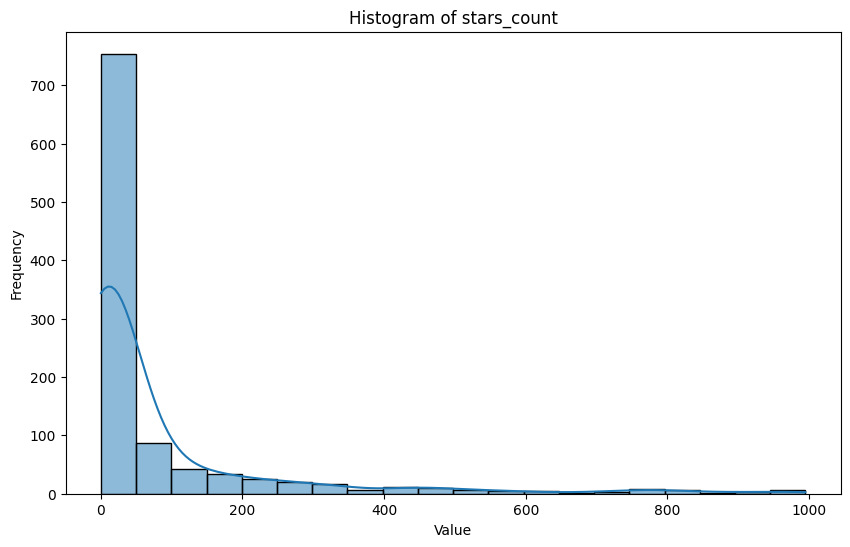

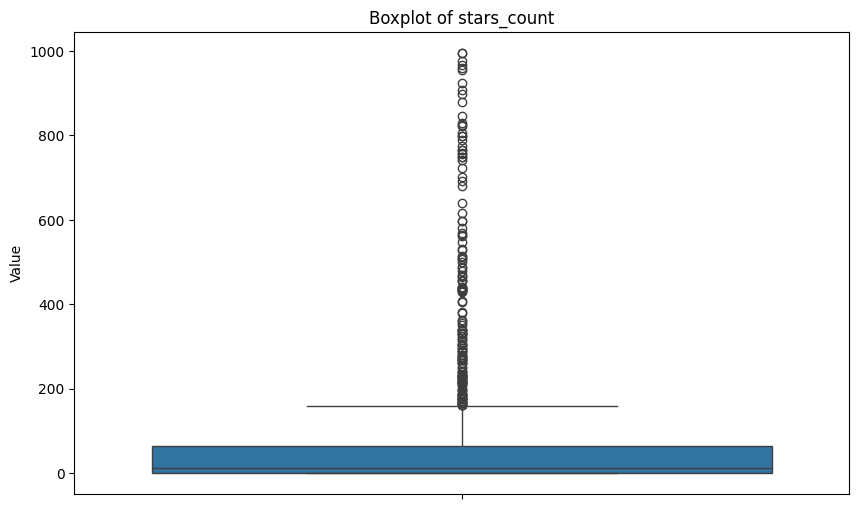

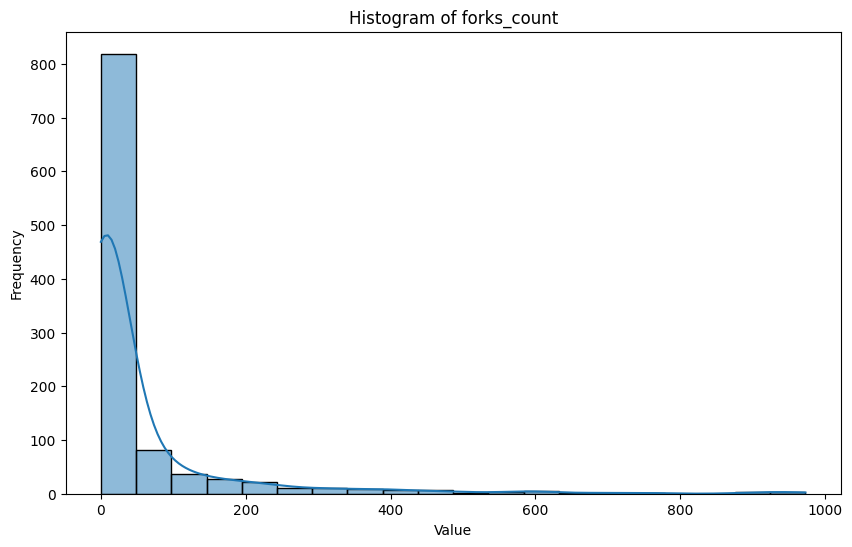

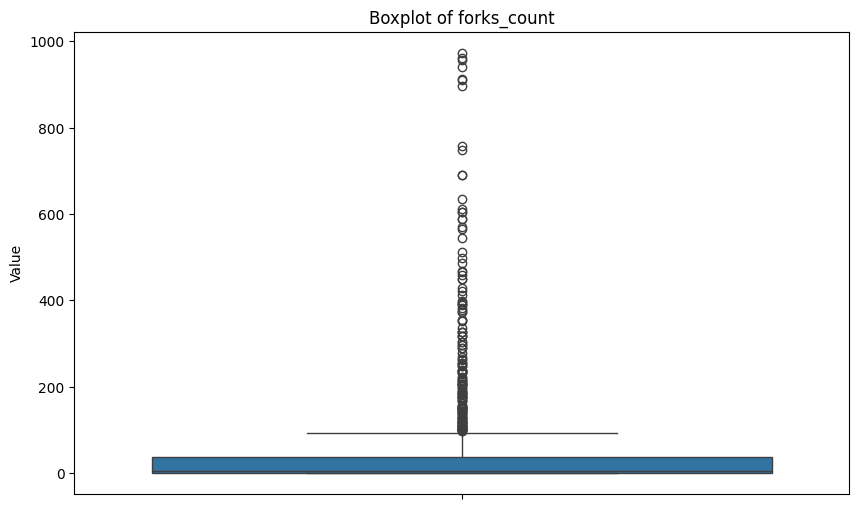

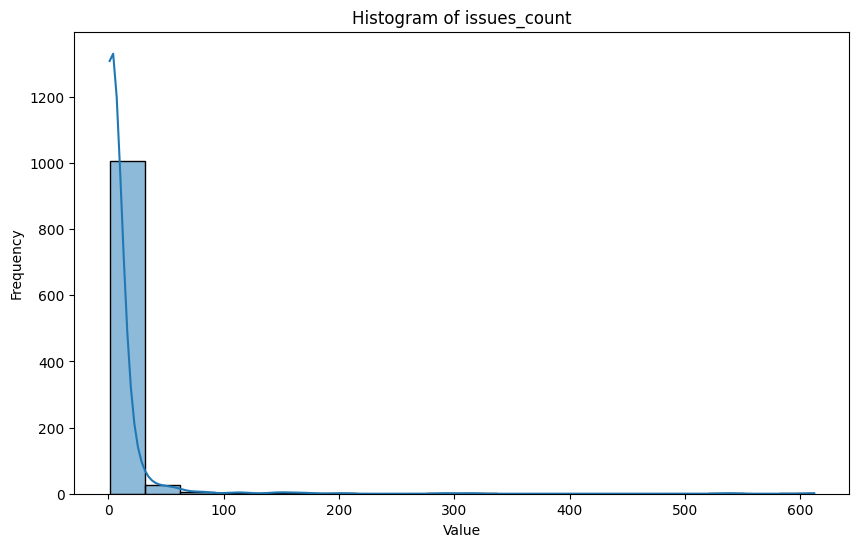

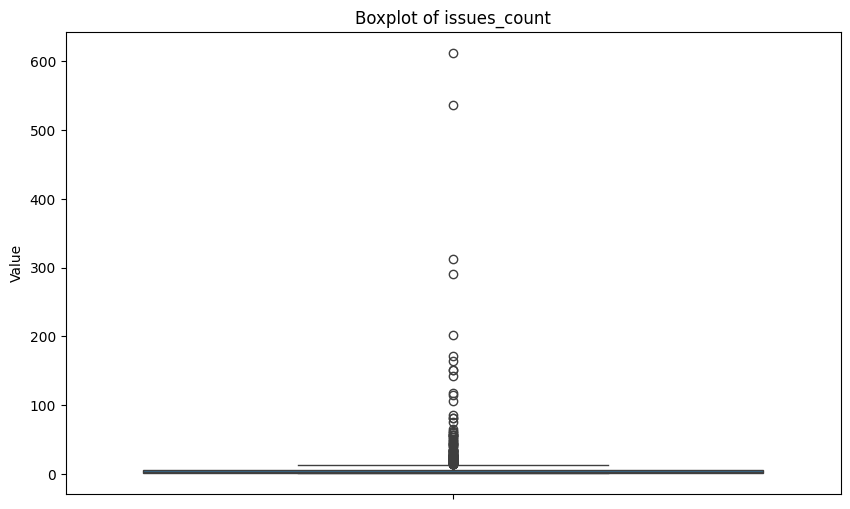

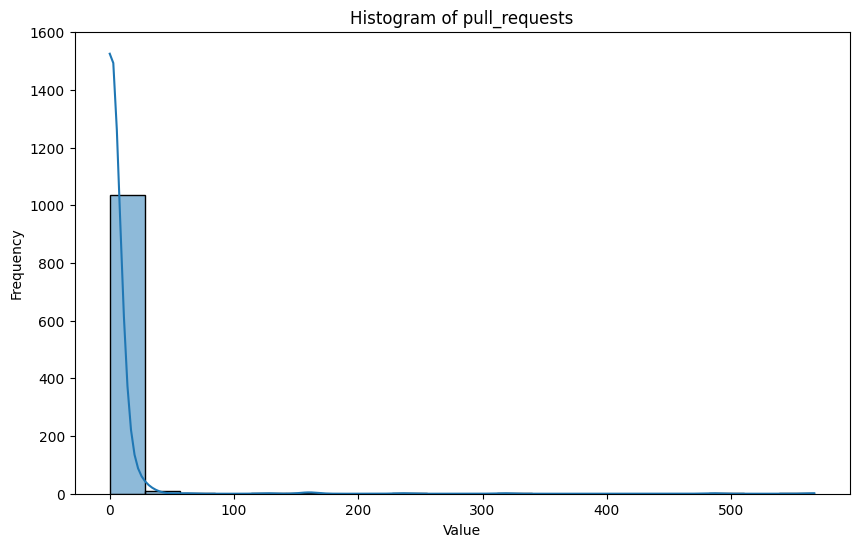

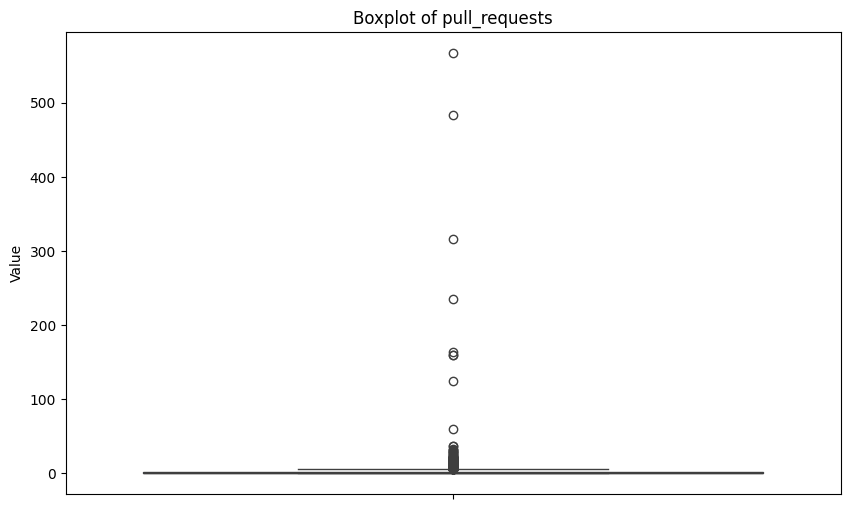

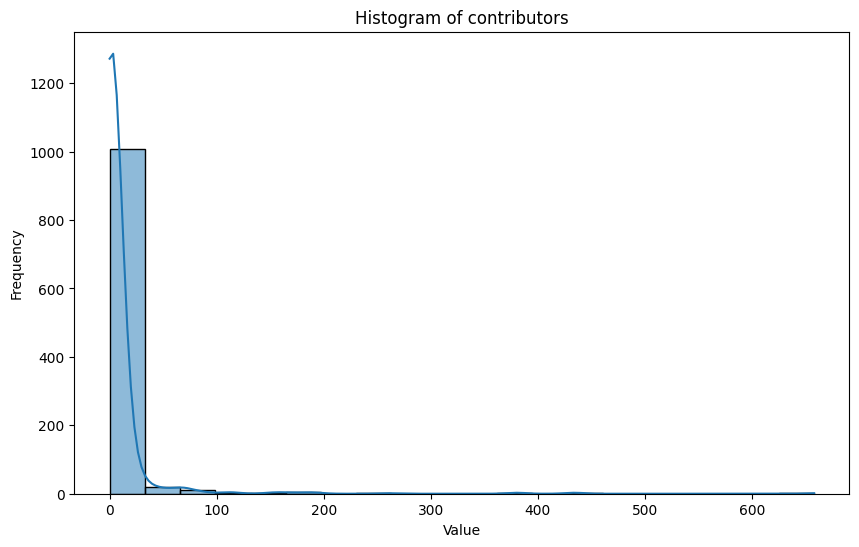

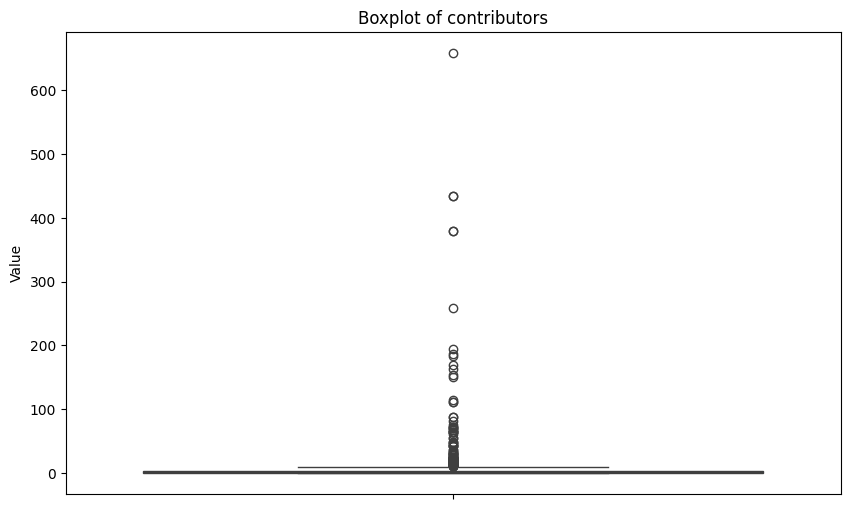

In [5]:
# 对数值属性进行可视化处理
for col in numeric_attributes:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=col, bins=20, kde=True)
    plt.title('Histogram of {}'.format(col))
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, y=col)
    plt.title('Boxplot of {}'.format(col))
    plt.ylabel('Value')
    plt.show()

In [ ]:
# 由于该数据集没有缺失值，代码不执行
""" # 分别使用四种策略对缺失值进行处理

# 策略1: 将缺失部分剔除
df_dropna = df.dropna()

# 策略2: 用最高频率值来填补缺失值
mode_values = df.mode().iloc[0]
df_fillna_mode = df.fillna(mode_values)
# 策略3: 通过属性的相关关系来填补缺失值
# 例如，可以使用线性回归模型来预测缺失值
from sklearn.linear_model import LinearRegression

def fillna_regression(df, target_col, feature_cols):
    # 获取含有缺失值的数据和完整数据
    missing_data = df[df[target_col].isnull()]
    complete_data = df.dropna()
    
    X_train = complete_data[feature_cols]
    y_train = complete_data[target_col]
    X_test = missing_data[feature_cols]

    # 使用线性回归模型拟合数据
    model = LinearRegression()
    model.fit(X_train, y_train)

    # 预测缺失值
    missing_data[target_col] = model.predict(X_test)
    
    # 将填补后的数据合并到完整数据集中
    df_filled = pd.concat([complete_data, missing_data])
    
    return df_filled

# 示例调用
# 假设 'numeric_attribute1' 是目标列，'numeric_attribute2' 是特征列
feature_cols = ['numeric_attribute2']
df_fillna_regression = fillna_regression(df, 'numeric_attribute1', feature_cols)


# 策略4: 通过数据对象之间的相似性来填补缺失值
# 可以使用 KNN 算法来寻找相似的数据对象并填补缺失值
from sklearn.impute import KNNImputer

def fillna_knn(df, n_neighbors=5):
    imputer = KNNImputer(n_neighbors=n_neighbors)
    df_filled = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
    return df_filled

# 示例调用
df_fillna_knn = fillna_knn(df) """

In [7]:
# 保存处理后的数据集
df.to_csv('gitdataset_processed.csv', index=False)